In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from bayes_opt import BayesianOptimization

## Define functions to be optimized

In [3]:
# Define the black box function that we want to evaluate
def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    return -x ** 2 - (y - 1) ** 2 + 1


def branin_hoo_function(x1, x2):
    # SEE: https://statisticaloddsandends.wordpress.com/2019/06/24/test-functions-for-optimization-and-the-branin-hoo-function/
    a = 1
    b = 5.1 / (4 * math.pi**2)
    c = 5 / math.pi
    r = 6
    s = 10
    t = 1 / (8 * math.pi)
    return a * (x2 - b*x1**2 + c*x1 - r)**2 + s*(1-t)*math.cos(x1) + s

## Optimize black-box function

In [4]:
# Bounded region of parameter space
pbounds = {'x': (2, 4), 'y': (-3, 3)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

optimizer.maximize(
    init_points=5,
    n_iter=35,
)

max = optimizer.max
print(max)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | -7.135    | 2.834     | 1.322     |
| 2         | -7.78     | 2.0       | -1.186    |
| 3         | -16.13    | 2.294     | -2.446    |
| 4         | -8.341    | 2.373     | -0.9266   |
| 5         | -7.392    | 2.794     | 0.2329    |
| 6         | -15.02    | 4.0       | 0.8624    |
| 7         | -3.799    | 2.184     | 0.83      |
| 8         | -5.343    | 2.0       | 2.531     |
| 9         | -14.29    | 3.36      | 3.0       |
| 10        | -3.363    | 2.0       | 1.603     |
| 11        | -3.873    | 2.0       | 0.06544   |
| 12        | -3.012    | 2.0       | 1.108     |
| 13        | -3.072    | 2.0       | 0.7319    |
| 14        | -3.003    | 2.0       | 0.9458    |
| 15        | -3.0      | 2.0       | 1.006     |
| 16        | -3.0      | 2.0       | 1.003     |
| 17        | -3.0      | 2.0       | 1.002     |
| 18        | -3.0      | 2.0       | 1.002     |


Text(0, 0.5, 'y')

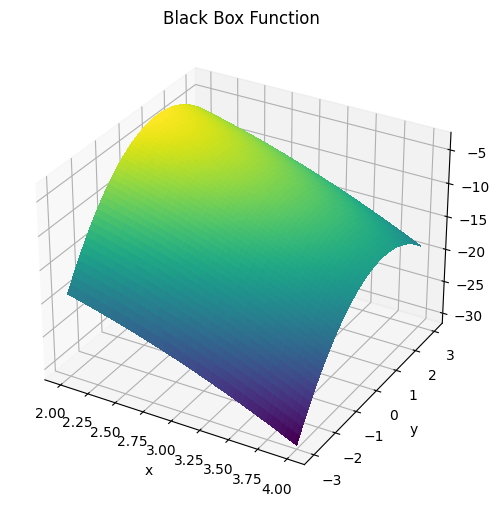

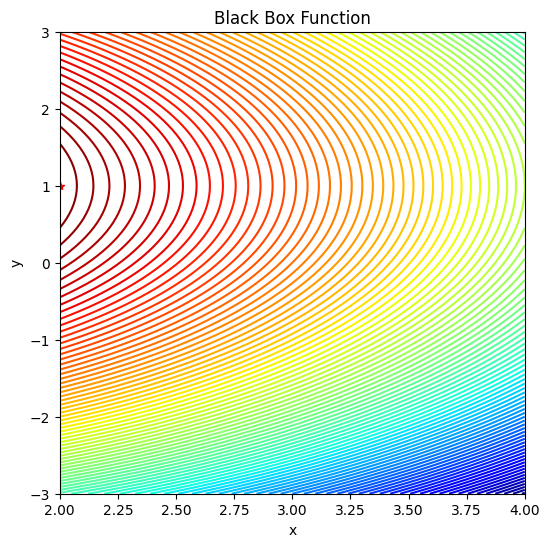

In [5]:
x_axis = np.linspace(2, 4, 100)
y_axis = np.linspace(-3, 3, 100)
XA, YA = np.meshgrid(x_axis, y_axis)
vfunc = np.vectorize(black_box_function)
Z = vfunc(XA, YA)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(XA, YA, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)
plt.title("Black Box Function")
plt.xlabel("x")
plt.ylabel("y")

fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(XA, YA, Z, levels=100, cmap=cm.jet)
max = [max["params"]["x"], max["params"]["y"]]
ax.plot(*max, "r*")
plt.title("Black Box Function")
plt.xlabel("x")
plt.ylabel("y")

## Optimize Branin-Hoo function

In [9]:
# Bounded region of parameter space
pbounds = {'x1': (-5, 10), 'x2': (0, 15)}

optimizer = BayesianOptimization(
    f=lambda x1, x2: -1 * branin_hoo_function(x1, x2),
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    allow_duplicate_points=True
)

optimizer.maximize(
    init_points=5,
    n_iter=40,
)

min = optimizer.max
print(min)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
| 1         | -106.2    | -4.535    | 5.98      |
| 2         | -5.381    | 2.49      | 4.574     |
| 3         | -79.78    | -3.014    | 3.066     |
| 4         | -49.73    | 8.999     | 9.102     |
| 5         | -21.98    | 4.574     | 5.07      |
| 6         | -2.672    | 3.351     | 0.6807    |
| 7         | -9.968    | 9.907     | 0.0       |
| 8         | -145.0    | 2.177     | 15.0      |
| 9         | -2.756    | 10.0      | 3.905     |
| 10        | -18.46    | 6.78      | 1.264     |
| 11        | -43.24    | 0.6302    | 0.0       |
| 12        | -145.9    | 10.0      | 15.0      |
| 13        | -0.5107   | 3.054     | 2.62      |
| 14        | -11.4     | 10.0      | 6.079     |
| 15        | -17.51    | -5.0      | 15.0      |
| 16        | -35.01    | -4.952    | 12.28     |
| 17        | -13.93    | 4.952     | 0.0       |
| 18        | -3.038    | 10.0      | 1.957     |


Text(0, 0.5, 'y')

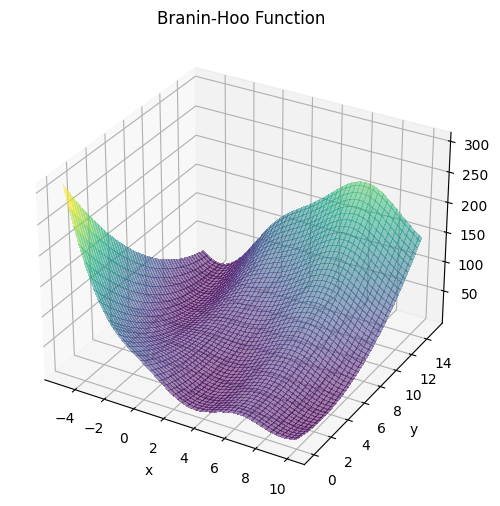

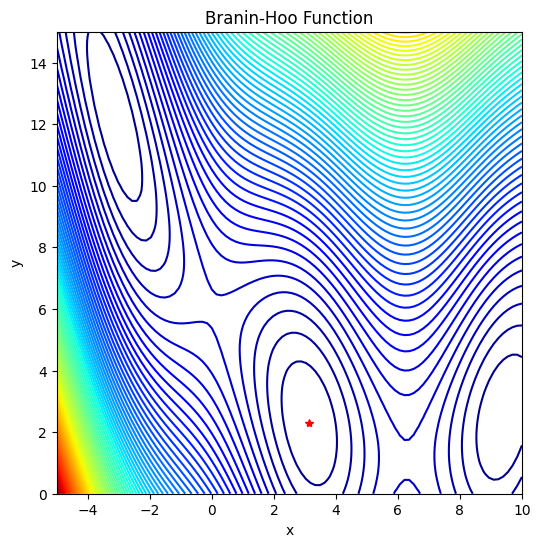

In [7]:
x_axis = np.linspace(-5, 10, 100)
y_axis = np.linspace(0, 15, 100)
XA, YA = np.meshgrid(x_axis, y_axis)
vfunc = np.vectorize(branin_hoo_function)
Z = vfunc(XA, YA)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(XA, YA, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False, alpha=0.5)
plt.title("Branin-Hoo Function")
plt.xlabel("x")
plt.ylabel("y")

fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(XA, YA, Z, levels=100, cmap=cm.jet)
min = [min["params"]["x1"], min["params"]["x2"]]
ax.plot(*min, "r*")
plt.title("Branin-Hoo Function")
plt.xlabel("x")
plt.ylabel("y")